# Mall Customer Segmentation - Business Problem

---

### What is Customer Segmentation?
- Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately.

**In business-to-business marketing, a company might segment customers according to a wide range of factors, including:**

- Industry
- Number of employees
- Products previously purchased from the company
- Location

**In business-to-consumer marketing, companies often segment customers according to demographics that include:**

- Age
- Gender
- Marital status
- Location (urban, suburban, rural)
- Life stage (single, married, divorced, empty-nester, retired, etc.)

<hr><hr>

In [1]:
## Importing all required libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [2]:
## Loading the data...
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## About Features:
- **Customer ID** : All customers are presented with an unique ID.
- **Gender** : Customer gender (male or female).
- **Age** : Customers age.
- **Annual Income** : Annual income of customer [every unit is **$ 1000**].
- **Spending Score** : Spending score of customer on the scale of 1 to 100.

## Segmentation on the basis of 'Customer's Age' :

In [3]:
from sklearn.cluster import KMeans

## Clustering on the basis of "Age" and "Spending Scores"......
kmeans_age_vs_spend = KMeans(n_clusters=4, random_state=0).fit(data[['Age' , 'Spending Score (1-100)']])

Text(0.5, 1.0, 'Age vs Spending Score')

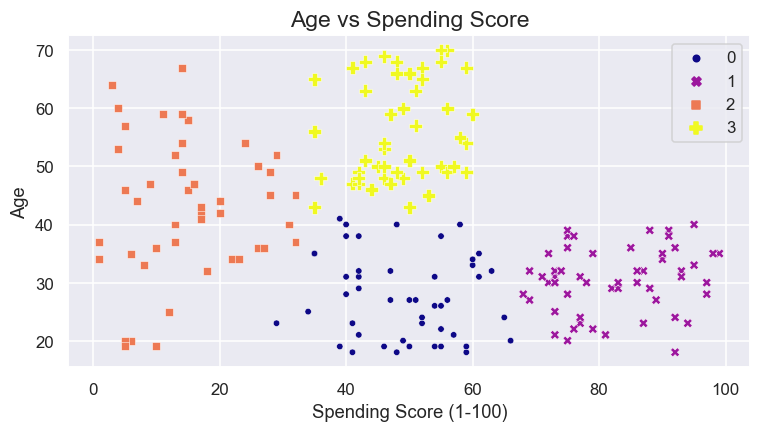

In [4]:
plt.figure(dpi = 110 , figsize = (8,4))
sns.scatterplot(x = data['Spending Score (1-100)'] , y = data['Age'] , hue = kmeans_age_vs_spend.labels_ , 
                style = kmeans_age_vs_spend.labels_ , size = kmeans_age_vs_spend.labels_ , palette = 'plasma')
plt.title("Age vs Spending Score" , fontsize = 15)

#### Strategy based on customer's age:
- **Group 1:** Customers between the age of 18 - 40 and with the Spending Score of 70+ are the 'Loyal Customers'.
- **Group 2:** Customers between the age of 18 - 40 and with the Spending Score between 30 - 70 are the 'Satisfied Customers'.
- **Group 3:** Customers between the age of 40 - 70 and with the Spending Score of 30 - 60 are again 'Satisfied Customers'.
- **Group 4:** Customers between the age of 18 - 70 and with the Spending Score less than 30 are the 'Roamers and can be called Dissatisfied Customers'

#### Our Strategy Should be:
- Retain customers of **Group 1**.
- Extend new offers to **Group 2** to make them 'Loyal Customers'.
- People of **Group 3** are of more age and looks little satisfied. We need to extend some offers to these people with respect to their interest.
- **Group 4** people are dissatisfied customers and we need to work towards increasing their engagement.

#### Points of serious concern:
- There are no 'Loyal Customers' in the age group of **40 - 70**. This calls for paying more attention to people in this age group to expand our customer base.
<hr>

<AxesSubplot:xlabel='Gender', ylabel='count'>

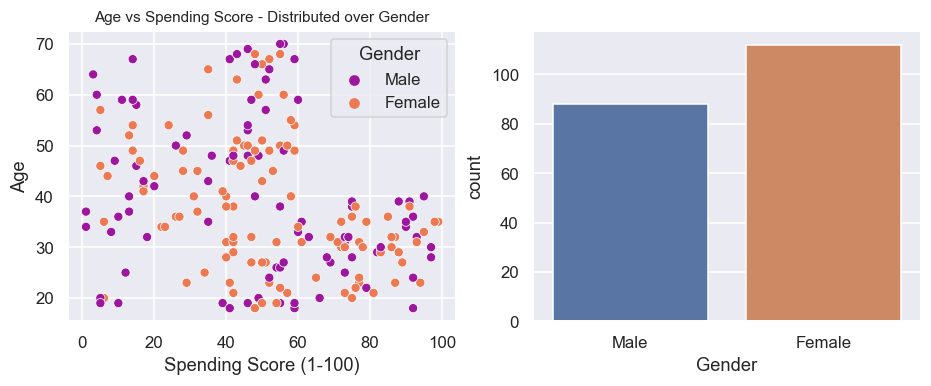

In [5]:
plt.figure(dpi = 110 , figsize = (10,3.5))
plt.subplot(1,2,1)
sns.scatterplot(x = data['Spending Score (1-100)'] , y = data['Age'] , hue = 'Gender' , data = data , palette = 'plasma')
plt.title("Age vs Spending Score - Distributed over Gender" , fontsize = 10)
plt.subplot(1,2,2)
sns.countplot(x = data['Gender'])

- There are more **females** in 200 customers than **males**.
- Both the genders are **equally distributed** in all age groups.

## Segmentation on the basis of 'Customer's Annual Income' :

In [6]:
## Creating new feature based on the Customer's Spending Score....
data['Spending Score categorical'] = data['Spending Score (1-100)']

for i in range(data.shape[0]):
    if data['Spending Score categorical'][i] <= 25:
        data['Spending Score categorical'][i] = 'Spending Score <= 25'
    elif data['Spending Score categorical'][i] <= 70:
        data['Spending Score categorical'][i] = '25 > Spending Score <= 70'
    elif data['Spending Score categorical'][i] > 70:
        data['Spending Score categorical'][i] = 'Spending Score > 70'

<AxesSubplot:xlabel='count', ylabel='Spending Score categorical'>

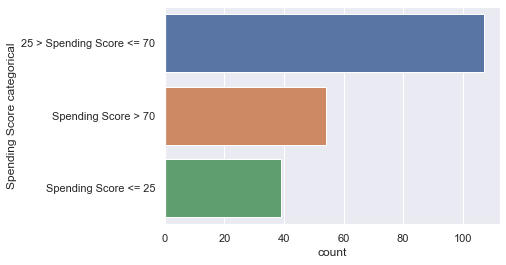

In [7]:
## Countplot for "Spending Score"....
sns.countplot(y = data['Spending Score categorical'])

In [8]:
## Clustering on the basis of "Annual Income" and "Spending Scores"......
kmeans_income_vs_spend = KMeans(n_clusters=5, random_state=0).fit(data[['Annual Income (k$)' , 'Spending Score (1-100)']])

Text(0.5, 1.0, 'Annual Income (k$) vs Spending Score')

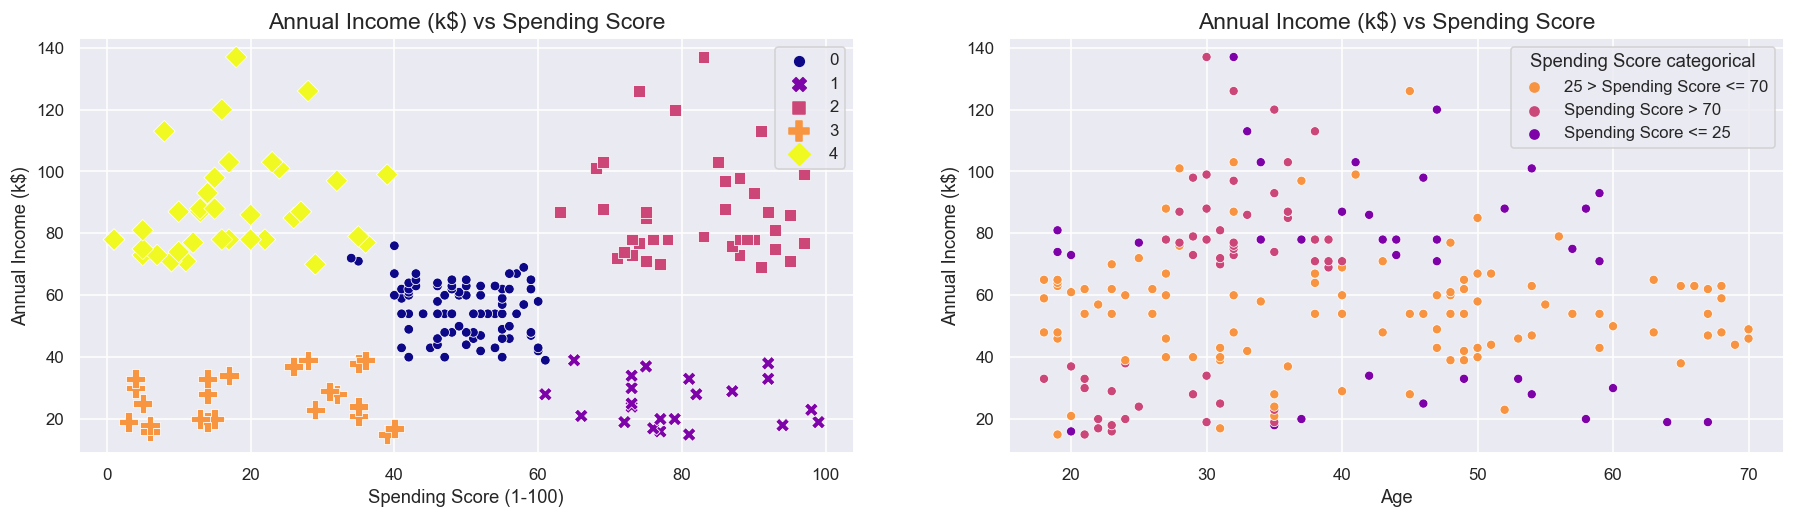

In [9]:
plt.figure(dpi = 110 , figsize = (20,5))

## Clustering - Annual Income (k$) vs Spending Score....
plt.subplot(1,2,1)
sns.scatterplot(x = data['Spending Score (1-100)'] , y = data['Annual Income (k$)'] , hue = kmeans_income_vs_spend.labels_ , 
                style = kmeans_income_vs_spend.labels_ , size = kmeans_income_vs_spend.labels_ , sizes=(40, 200) , 
                palette = 'plasma' )
plt.title("Annual Income (k$) vs Spending Score" , fontsize = 15)

## Clustering - Annual Income (k$) vs Age....
plt.subplot(1,2,2)
sns.scatterplot(x = data['Age'] , y = data['Annual Income (k$)'] , hue = 'Spending Score categorical', data = data 
                ,  palette = 'plasma_r')
plt.title("Annual Income (k$) vs Spending Score" , fontsize = 15)

#### Strategy based on customer's Annual Income:
- **Group 1:** Customers with Spending Score of 70+ and High Annual Income are the 'Loyal Customers'.
- **Group 2:** Customers with Spending Score of 70+ and Low Annual Income are the 'Loyal Customers'.
- **Group 3:** Customers with Spending Score of 25 - 60 and Optimal Annual Income are 'Satisfied Customers'.
- **Group 4:** Customers with the Spending Score less than 40 and High Annual Income are the 'Roamers and can be called Dissatisfied Customers.
- **Group 5:** Customers with the Spending Score less than 40 and Low Annual Income are again 'Roamers and can be called Dissatisfied Customers.

#### Our Strategy Should be:
- There is not much coorelation between customer's annual income and his/hers buying trend like Age. 

- Retain customers of **Group 1 and 2**.
- Extend new offers to **Group 3** to make them 'Loyal Customers'.
- People of **Group 4** are Roamers and looks little dissatisfied. We need to extend some offers to these people with respect to their interest.
- **Group 5** people are dissatisfied customers and we need to work towards increasing their engagement. Because of there low annual income we can start some monthly ration program for them. This way we can expand our customer base.

#### Points To Note:
- There is no correlation between Customer's Annual Income and Age. Hence we need to consider these two features of customers seperately.
- Majority of our customer base falls under the spending score of **25 to 70**. Than we have our Loyal Customers with score 70+.
<hr>

<hr>

## Customer Segementation Report:

### Our Target Group will be:
- **Customers between the age of 40 - 70:**
  -  This group looks satisfied with the present sercive but still the are huge in number and need to be taken properly.
  - None of these customers can be called "Loyal" because of there realtively low spending scores.
  - We need to work towards increasing sales from these peoples,what we can do:
    - Bring discount plans and offers.
    - Carry out personalized campaigns based on their purchase history.
    - Add new products with good discounts that can attract these people.
    - Conduct surveys to get better understanding of their needs.


- **Customers between the age of 18 - 70 and with the Spending Score less than 30:**
  - This is a group of "Roamers". We need to work towards increasing their retention and improve spending score. This can be done by:
     - Offering discounts on consecutive  buys.
     - Giving purchase vouchers.
     - Incorporating new line of products by surveying these people.  
  

- **Customers with the Spending Score less than 40 and High Annual Income:**
  - Thes people have high buying capacity. We need to work towards understanding their pain points. 
  - Nominal discounts and offers will not do much good. 
  - There can be some problem lying with our product and service, we need to find it out and improve.
  
  
- **Customers with the Spending Score less than 40 and Low Annual Income:**
  - This is a group of "Roamers". There are prople with low income still under loyal category. we need to find our USP which helping in their retention. We can divert that USP with better offerings to these people.
  - We need to work towards increasing their retention and improve spending score. This can be done by:
     - Offering discounts on consecutive  buys.
     - Giving purchase vouchers.
     - Incorporating new line of products by surveying these people.

## Final Points to Note:

- We need to get a better understanding of the business to extend offers to customers falling under different groups.
- Targeting shoould be done on the basis of customer's Age and Annual Income only.
- Proper research and surveying should be done before extending offers to target groups.
- All offers should be highly viable to sustain.
- With respect to addition of new product types, we again need to research and find out way to retain our USP and innovate.